# Introducing Scikit-Learn

## Data Representation in Scikit-Learn

In [1]:
# Data as a table

import seaborn as sns

In [8]:
iris = sns.load_dataset('iris')

# Display the feature matrix
print(type(iris))
iris.head()

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
%matplotlib inline
sns.set()

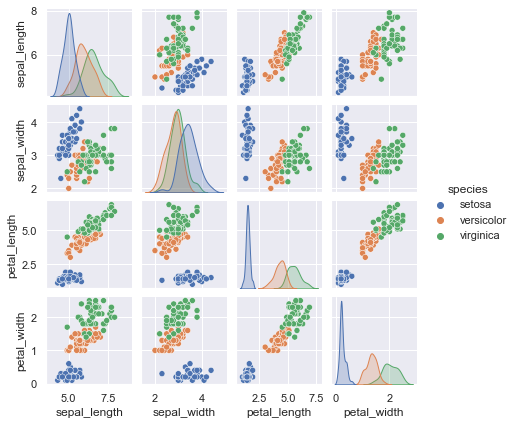

In [7]:
sns.pairplot(iris, hue='species', height=1.5);

In [11]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [12]:
y_iris = iris['species']
y_iris.shape

(150,)

## Scikit-Learn's Estimator API

* Consistency - Objects share a common interface with consistent documentation
* Inspections - All parameters are exposed for interrogation
* Limited Object Hierarchy - Only algorithms are set as python classes.  Datasets are np.array, pd.DataFrame, or scipy sparse matrices. Parameter names are Python strings.
* Composition - Where applicable more complex algorithms are composed of more the other more fundamental algorithms
* Sensible Defaults - User-specified parameters are set to default values that should work in most cases.

### Basics of the API

1. Choose a class of model by importing the appropriate estimator class from sklearn.
1. Choose model hyperparameters by instantiating this class with the desired values.
1. Arrange data into the features matrix and target vector.
1. Fit the model by calling the fit( ) method of the model instance.
1. Apply the model to new data.
    * For Supervised Learning
        * use the .predict( ) method
    * For Unsupervised Learning
        * use .transform( ) to transform or
        * use .predict( ) to make predictions
    
## Supervised Learning Example : Simple Linear regression

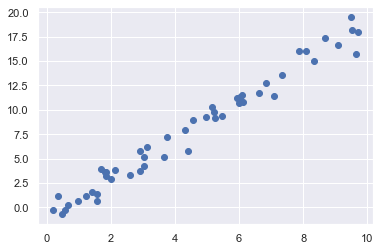

In [13]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt. scatter(x,y);

### Choose a class of model

In [25]:
from sklearn.linear_model import LinearRegression

### Choose model hyperparameters

In [17]:
model = LinearRegression(fit_intercept=True).

sklearn.linear_model._base.LinearRegression

### Arrange the data into a features matrix and new target vector

In [20]:
X = x[:, np.newaxis]
X.shape

(50, 1)

### Fit the model to your data

In [21]:
model.fit(X, y)

LinearRegression()

In [23]:
model.coef_

array([1.9776566])

In [24]:
model.intercept_

-0.9033107255311164

### Predict Labels for Unknown Data

In [28]:
xfit = np.linspace(-1,11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

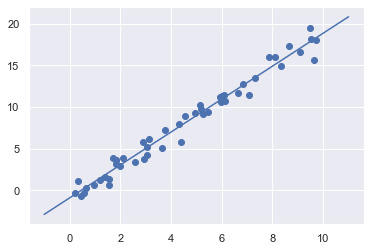

In [29]:
plt.scatter(x,y)
plt.plot(xfit, yfit);

## Supervised Learning Example

In [33]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [36]:
from sklearn.naive_bayes import GaussianNB # choose model class
model = GaussianNB()                       # Instantiate the model
model.fit(Xtrain, ytrain)                  # Fit the Model to the training data
y_model = model.predict(Xtest)             # Predict on new data

In [37]:
# Check the model accuracy

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## Unsupervised Learning Example : Iris Dimensionality

Can we reduce the dimensionality of the iris dataset from 4 to something less?
<br><br>
Let's try Principal Component Analysis (PCA)

In [38]:
from sklearn.decomposition import PCA    # Choose the model class
model = PCA(n_components=2)              # Instantiate the model
model.fit(X_iris)                        # Fit the data
X_2D = model.transform(X_iris)           # Transform the data to two dimensions

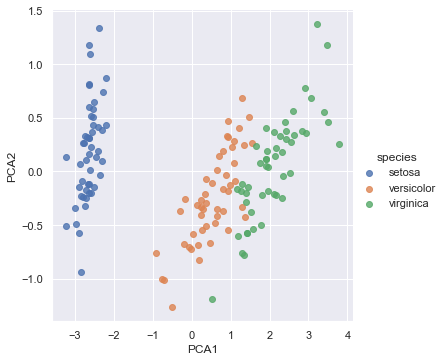

In [39]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot(x='PCA1', y='PCA2', hue='species', data=iris, fit_reg=False)

## Unsupervised Learning : Iris Clustering 

Try Gaussian Mixture Model (GMM)

In [42]:
from sklearn.cluster import KMeans                     # Choose the model class

In [45]:
model = KMeans(n_clusters=3) # instantiate the model
model.fit(X_iris)                                   # fit to the data, notice Y is not included
y_clusters = model.predict(X_iris)                        # Determine Cluster Labels

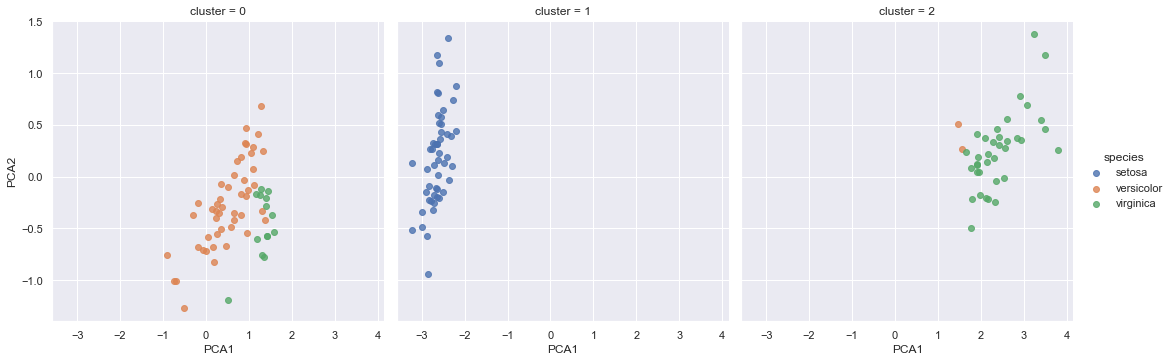

In [47]:
iris['cluster']= y_clusters
sns.lmplot(x='PCA1', y='PCA2', data=iris, hue='species', col='cluster', fit_reg=False);

## Mess around with the Hand Written Digits

In [48]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

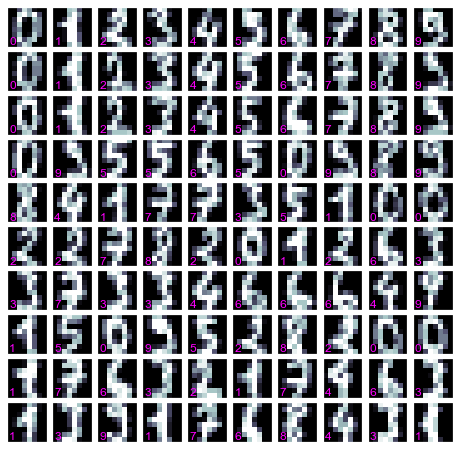

In [57]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='bone', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='magenta')

In [58]:
X = digits.data
X.shape

(1797, 64)

In [59]:
y = digits.target
y.shape

(1797,)

### Unsupervised Learning : Dimensionality Reduction

Just to take a look

In [73]:
from sklearn.manifold import Isomap

In [74]:
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

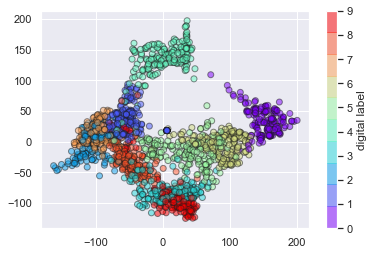

In [75]:
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target,
           edgecolor='k', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', 10))
plt.colorbar(label='digital label', ticks=range(10))

### Let's try a classifier

In [76]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [77]:
from sklearn.naive_bayes import GaussianNB

In [79]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(89.18, 0.5, 'true value')

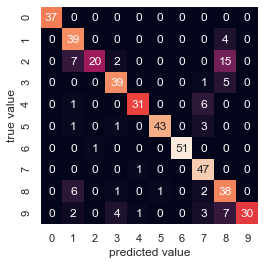

In [81]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

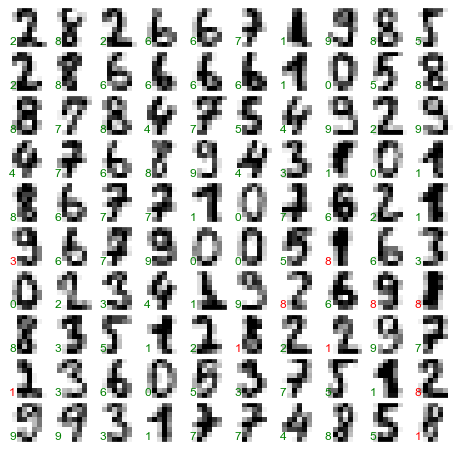

In [84]:
fig, axes = plt.subplots(10,10, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw={'hspace':0.1, 'wspace':0.1})

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i],),
           transform=ax.transAxes,
           color='green' if (ytest[i] == y_model[i]) else 'red')